In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Null Values in Dataset:
 unit            0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64

Summary Statistics:
                unit         cycle  op_setting_1  op_setting_2  op_setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000       20631.0   
mean      51.506568    108.807862     -0.000009      0.000002         100.0   
std       29.227633     68.880990      0.002187      0.000293           0.0   
min        1.000000      1.000000     -0.008700     -0.000600         100.0   
25%       26.000000     52.000000     -0.001500     -0.000200         100.0  

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


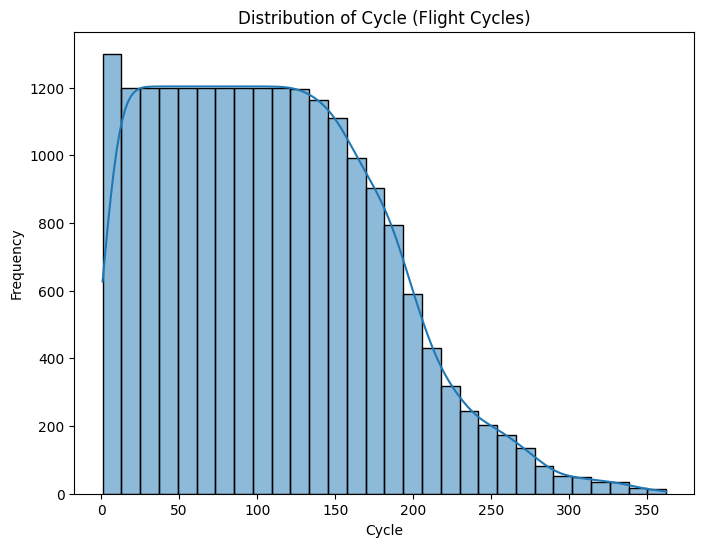

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


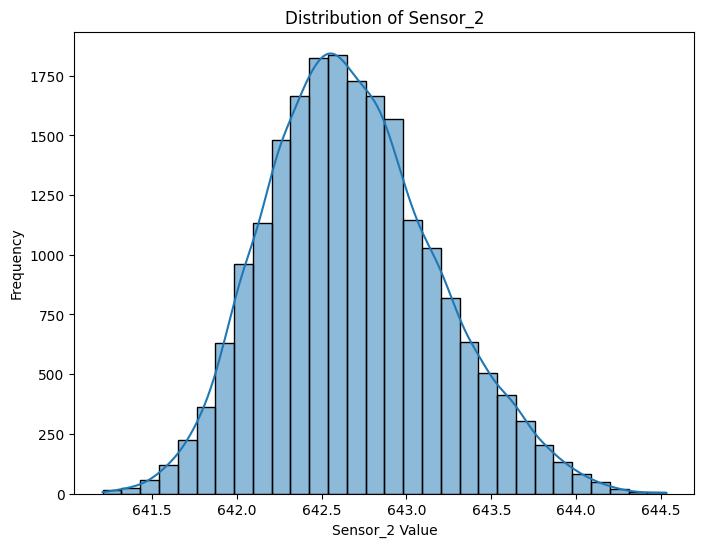


Accuracy Score: 0.9539728682170543

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1747
           1       0.87      0.82      0.85       317

    accuracy                           0.95      2064
   macro avg       0.92      0.90      0.91      2064
weighted avg       0.95      0.95      0.95      2064


=== Confusion Matrix ===
[[1709   38]
 [  57  260]]


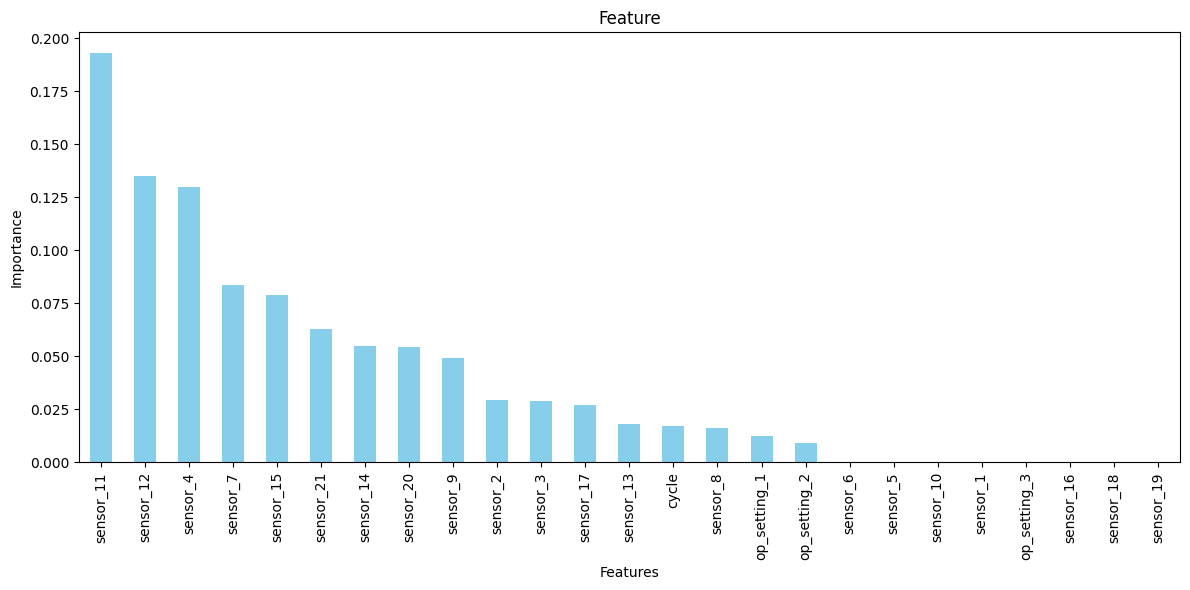

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the NASA CMAPSS FD001 dataset
data_path = "/kaggle/input/nasa-turbofan-engine-degradation-dataset/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData/train_FD001.txt"
columns = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_{i}' for i in range(1, 22)]
data = pd.read_csv(data_path, sep='\s+', header=None, names=columns)

# Step 2: Exploratory Data Analysis (EDA)
# Check for null values
print("Null Values in Dataset:\n", data.isnull().sum())

# Summary statistics for numerical features
print("\nSummary Statistics:\n", data.describe())

# Visualize distribution of 'cycle' (similar to your Classsize plot)
plt.figure(figsize=(8, 6))
sns.histplot(data['cycle'], bins=30, kde=True)
plt.title('Distribution of Cycle (Flight Cycles)')
plt.xlabel('Cycle')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of a key sensor (e.g., sensor_2)
plt.figure(figsize=(8, 6))
sns.histplot(data['sensor_2'], bins=30, kde=True)
plt.title('Distribution of Sensor_2')
plt.xlabel('Sensor_2 Value')
plt.ylabel('Frequency')
plt.show()

# Step 3: Create binary classification target
# Compute RUL as max_cycle - cycle for each engine
data['max_cycle'] = data.groupby('unit')['cycle'].transform('max')
data['RUL'] = data['max_cycle'] - data['cycle']
data['target'] = (data['RUL'] <= 30).astype(int)  # 1 if RUL <= 30, 0 otherwise

# Step 4: Prepare features and target
# Drop unnecessary columns
X = data.drop(['unit', 'max_cycle', 'RUL', 'target'], axis=1)
y = data['target']

# Scale numerical features (similar to your Classsize scaling)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Fix TypeError: Convert column names to strings
X_scaled.columns = X_scaled.columns.astype(str)

# Step 5: Split data (90% train, 10% test, as in your notebook)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=0)

# Step 6: Train Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Step 7: Predict
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

# Step 8: Evaluate
print("\nAccuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Step 9: Visualize Feature Importance
feature_importance = pd.Series(classifier.feature_importances_, index=X_scaled.columns)
plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()